In [1]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sriramranganathan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sriramranganathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [3]:
#print(message_text)
def msg_senti(message_text):
    # Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(message_text)
    # Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

In [4]:
# the variable 'message_text' now contains the text we will analyze.
message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''

msg_senti(message_text)

compound: -0.3804, neg: 0.093, neu: 0.836, pos: 0.071, 

In [5]:
message_text1= '''
Blogging and writing can feel lonely. 
And since may of us, write to pour our thoughts out, we don’t share as often. 
So, we miss out on the bonding and comfort that comes from being part of a group- 
with shared experiences, similar goals and aspirations and challenges.
'''
msg_senti(message_text1)

compound: 0.4627, neg: 0.081, neu: 0.762, pos: 0.156, 

In [6]:
message_text2= '''
I hate this! Ugh!
'''
msg_senti(message_text2)

compound: -0.7955, neg: 0.876, neu: 0.124, pos: 0.0, 

In [7]:
def msg_senti1(message_text):
    # Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(message_text)
    # Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen
    #print(scores.keys())
    for key in sorted(scores):
        #print('{0}: {1}, '.format(key, scores[key]), end='')
        a= scores['compound']
        return a
  
a= msg_senti1(message_text2)
print("Sentiment Score is ",a)

b= msg_senti1("Love this. WOW!")
print("Sentiment Score is ",b)

Sentiment Score is  -0.7955
Sentiment Score is  0.8757


In [8]:
def analyze_senti(message_text):
  if (msg_senti1(message_text) >= 0.7):
     return "Positive"
  elif (msg_senti1(message_text) <= -0.7):
     return "Negative"
  else:
    return "Mixed"

print(analyze_senti(message_text2))
print(analyze_senti("Love this. WOW!"))

Negative
Positive


In [9]:
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("amazon_alexa.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [11]:
def token_split(x):
    return nltk.word_tokenize(x)

In [12]:
df['review_tokens']=df['verified_reviews'].apply(token_split)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   review_tokens     3150 non-null   object
dtypes: int64(2), object(4)
memory usage: 147.8+ KB


In [14]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_tokens
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[Love, my, Echo, !]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"[Loved, it, !]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"[Sometimes, while, playing, a, game, ,, you, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"[I, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,[Music]


In [15]:
df['score']=df['verified_reviews'].apply(msg_senti1)

In [16]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            3150 non-null   int64  
 1   date              3150 non-null   object 
 2   variation         3150 non-null   object 
 3   verified_reviews  3150 non-null   object 
 4   feedback          3150 non-null   int64  
 5   review_tokens     3150 non-null   object 
 6   score             3150 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 172.4+ KB


,rating,date,variation,verified_reviews,feedback,review_tokens,score
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"[Love, my, Echo, !]",0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"[Loved, it, !]",0.6360


In [17]:
#Remove stop words
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

#no_stop_words = remove_stop_words(reviews_train_clean)

In [18]:
df['review_tokens']=df['review_tokens'].apply(remove_stop_words)

In [19]:
df['review_tokens']=df['review_tokens'].apply(lambda x: ','.join(map(str, x)))

In [20]:
df.tail(8)

,rating,date,variation,verified_reviews,feedback,review_tokens,score
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1,"My,three,year,old,loves,,.,Good,,,basic,househ...",0.8519
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,"Awesome,device,wish,I,bought,one,ages,ago,.",0.7783
3144,5,30-Jul-18,Black Dot,love it,1,"love,",0.6369
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"Perfect,,kids,,,adults,,everyone,,,!,!",0.6467
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"Listening,,music,,,searching,locations,,,check...",0.0000
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"I,,love,,things,,,,,,running,,entire,home,,,TV...",0.9485
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,"Only,complaint,I,,,,,sound,quality,,n't,great,...",0.0008
3149,4,29-Jul-18,Black Dot,Good,1,Good,0.4404


In [23]:
df['rating'].unique()

array([5, 4, 3, 2, 1])

In [24]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [45]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [47]:
# Supply the text to be crafted into wordcloud as make_wordcloud(text)
from wordcloud import WordCloud, STOPWORDS
def make_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', 
                      colormap='Set1', collocations=False, stopwords = STOPWORDS).generate(text)
    plot_cloud(wordcloud)
    
    

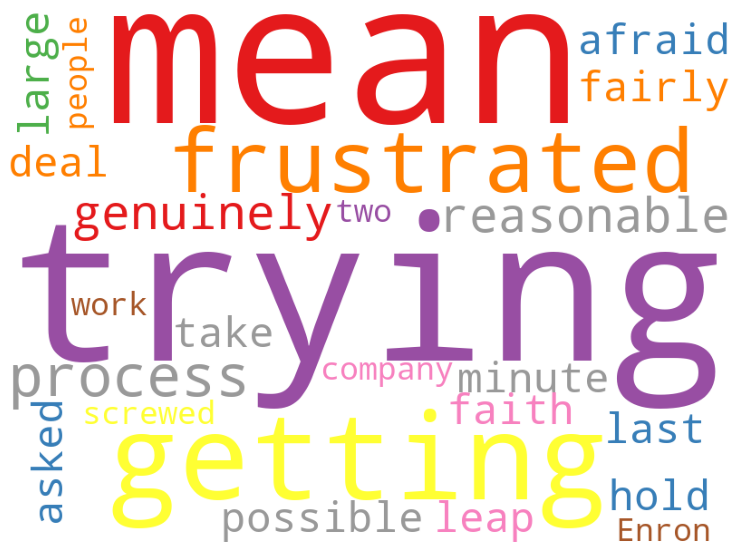

In [48]:
text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
make_wordcloud(text)

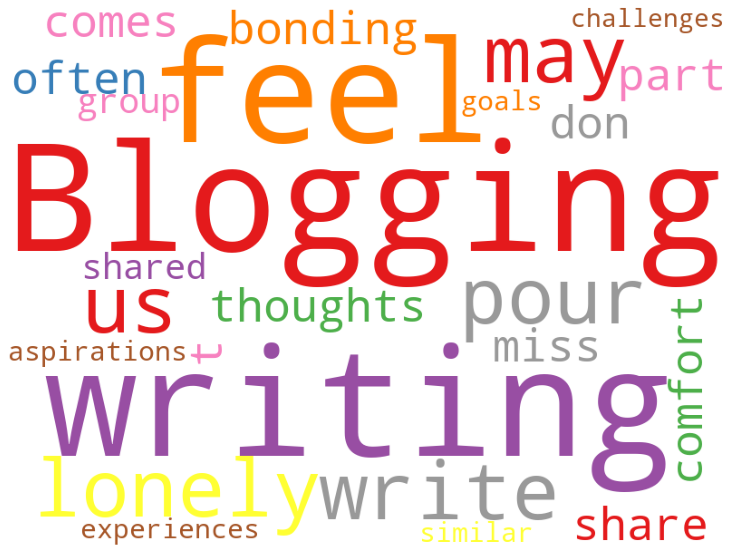

In [46]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 600, random_state=1, background_color='white', 
                      colormap='Set1', collocations=False, stopwords = STOPWORDS).generate(message_text1)
#colormap colors reference:https://matplotlib.org/stable/gallery/color/colormap_reference.html
# color charts reference: http://www.science.smith.edu/dftwiki/index.php/Color_Charts_for_TKinter
# Plot
plot_cloud(wordcloud)

In [34]:
output_series = df.groupby(['rating','variation'])['review_tokens'].apply(list)

In [35]:
print(output_series)

rating  variation  
1       Black          [Item,,longer,works,,,5,months,,use,.,Will,,co...
        Black  Dot     [I,,quite,disappointed,,,product.There,clearly...
        Black  Plus    [Alexa,,’,,know,answers,,many,questions,,asked...
        Black  Show    [Waste,,money,,,echo,generation,2,.,You,,’,,re...
        Black  Spot    [It,,,slow,compared,,,echo, When,,first,receiv...
                                             ...                        
5       White          [This,,,2nd,one,,,love,,!, This,small,echo,dot...
        White  Dot     [Small,device,,,kids,like,,ask,questions,.,Ver...
        White  Plus    [Great,speaker,,n,,!,I,love,,,much,,,,alexa,ta...
        White  Show    [,,I,expected,,,already,,2,,shows, Excellent,,...
        White  Spot    [I,love,,Echo,Spot,.,This,bedside,alarm,clock,...
Name: review_tokens, Length: 73, dtype: object


In [36]:
print(output_series[1])

variation
Black                           [Item,,longer,works,,,5,months,,use,.,Will,,co...
Black  Dot                      [I,,quite,disappointed,,,product.There,clearly...
Black  Plus                     [Alexa,,’,,know,answers,,many,questions,,asked...
Black  Show                     [Waste,,money,,,echo,generation,2,.,You,,’,,re...
Black  Spot                     [It,,,slow,compared,,,echo, When,,first,receiv...
Charcoal Fabric                 [Not,much,features,., Alexa,hardly,came,,.., N...
Configuration: Fire TV Stick    [I,,never,buy,anything,Amazon,makes,,!,This,fi...
Sandstone Fabric                [Stopped,working,,2,weeks,,,,n't,follow,comman...
White                           [It,worked,,,month,,,,,stopped,.,I,'ve,tried,e...
White  Dot                      [Used,twice,,working,!,!,!,!,!,!,!, , I,,,real...
White  Plus                     [Terrible,.,Stopped,working,,one,day,., It,,,s...
White  Show                     [, Do,n't,waste,,money,.,I,,,echo,gen,1,,,,ech...
White 

In [37]:
df_combo = df.groupby(['rating', 'variation'], as_index = False).agg({'review_tokens': ' '.join})

In [38]:
df_combo.head()

,rating,variation,review_tokens
0,1,Black,"Item,,longer,works,,,5,months,,use,.,Will,,con..."
1,1,Black Dot,"I,,quite,disappointed,,,product.There,clearly,..."
2,1,Black Plus,"Alexa,,’,,know,answers,,many,questions,,asked,..."
3,1,Black Show,"Waste,,money,,,echo,generation,2,.,You,,’,,rea..."
4,1,Black Spot,"It,,,slow,compared,,,echo When,,first,received..."


In [39]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         73 non-null     int64 
 1   variation      73 non-null     object
 2   review_tokens  73 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


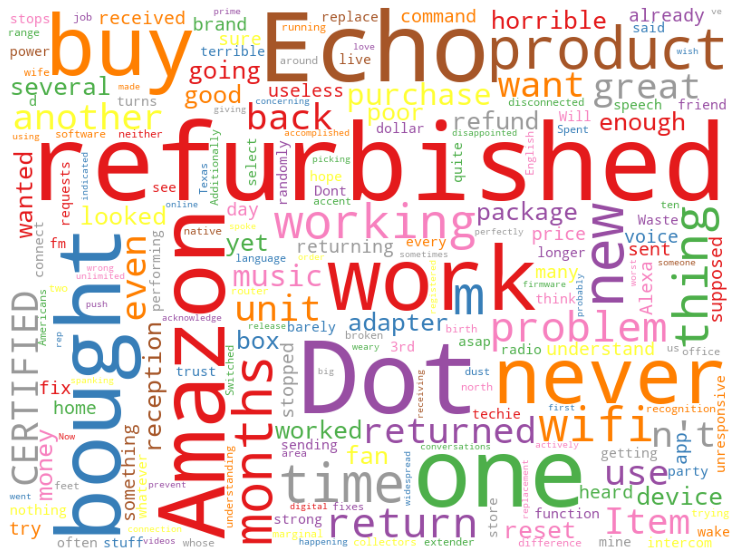

In [50]:
make_wordcloud(df_combo['review_tokens'].values[0])

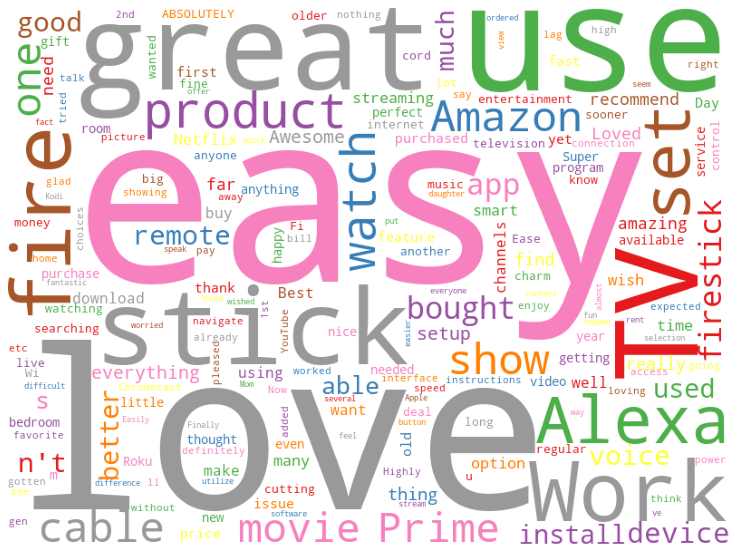

In [54]:
make_wordcloud(df_combo['review_tokens'].values[63])

In [28]:
df.to_csv('AlexaReviews.csv',index=False)